In [3]:
#1 
import numpy as np
from scipy.stats import poisson

x=15
mean=6.3

p=poisson.pmf(x,mean)

z_score = (x - mean) / (mean**0.5)

if z_score >= 2:
    print("significantly larger")
else:
    print("not significantly larger")
    

significantly larger


In [9]:
#2
import numpy as np
import scipy
from scipy.stats import poisson

pre = np.array([120, 132, 120, 110, 115, 128, 120, 112, 110, 100])
post = np.array([140, 156, 145, 130, 117, 148, 137, 119, 127, 135])

n = 10
std1 = np.std(pre)
std2 = np.std(post)
mean1 = np.mean(pre)
mean2 = np.mean(post)

std = ((std1**2 + std2**2) / 2)**(0.5)
T = (mean1 - mean2) / (std * (2/n)**(0.5))

pvalue = scipy.stats.t.sf(abs(T), n/2 - 1)
print(pvalue)

0.008119965143597528


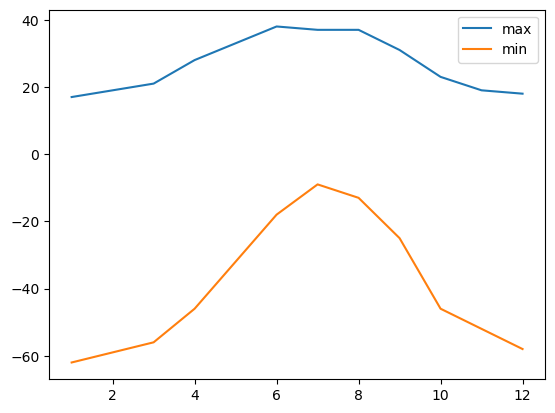

In [11]:
 #3
import numpy as np
import scipy
from scipy.stats import poisson
import matplotlib.pyplot as plt

max = [17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18]
min = [-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]
x = np.arange(1, 13, 1)

plt.plot(x, max, label = "max") 
plt.plot(x, min, label = "min") 
plt.legend() 
plt.show()

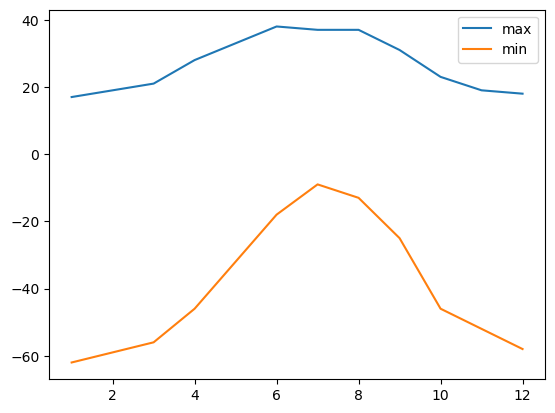

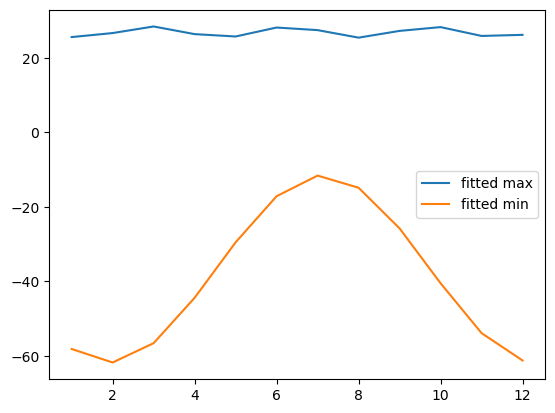

In [15]:
import numpy as np
import scipy
from scipy.stats import poisson

def temperature_function(x, A, B, C, D):
    return A * np.sin(B * x + C) + D

max = [17, 19, 21, 28, 33, 38, 37, 37, 31, 23, 19, 18]
min = [-62, -59, -56, -46, -32, -18, -9, -13, -25, -46, -52, -58]
x = np.arange(1, 13, 1)

plt.plot(x, max, label = "max") 
plt.plot(x, min, label = "min") 
plt.legend() 
plt.show()

params_max, _ = scipy.optimize.curve_fit(temperature_function, x, max)
params_min, _ = scipy.optimize.curve_fit(temperature_function, x, min)

smooth_max = temperature_function(x, *params_max)
smooth_min = temperature_function(x, *params_min)

plt.plot(x, smooth_max, label='fitted max')
plt.plot(x, smooth_min, label='fitted min')
plt.legend()
plt.show()

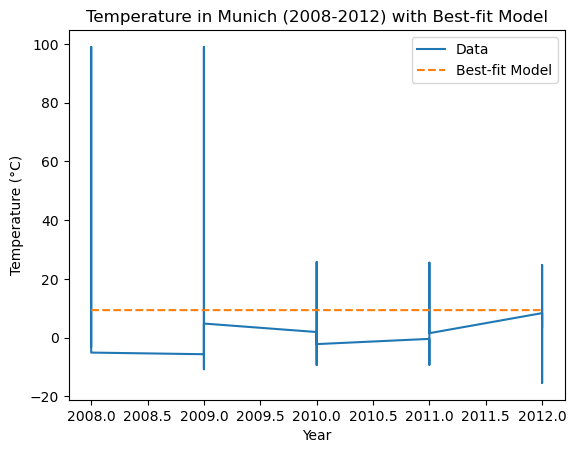

Best-fit values:
a = 5.29 ± 124335362.34
b = -0.79 ± 11270439.27
c = 5.63 ± 82435324.59

Overall average temperature in Munich: 8.94 °C

Typical daily average value for the coldest time of the year: 9.35 °C
Typical daily average value for the hottest time of the year: 1.90 °C

Comment on the meaning of the b parameter:
The 'b' parameter in the function represents the phase shift in the cosine function.
It determines the horizontal shift of the cosine curve along the time axis.
In the context of temperature modeling, 'b' influences the time at which the highest or lowest temperatures occur.


In [41]:
#5
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import pandas as pd

data = pd.read_csv(filepath_or_buffer='data/munich_temperatures_average_with_bad_data.txt', sep=' ',names=["Years", "Temperatures"])
data['Years'] = data['Years'].astype(int)
temperatures = data.iloc[:, 1]

def temperature_function(t, a, b, c):
    return a * np.cos(2 * np.pi * t + b) + c

mask = (years >= 2008) & (years <= 2012)
years_selected = years[mask]
temperatures_selected = temperatures[mask]

params, covariance = curve_fit(temperature_function, years_selected, temperatures_selected)

a_fit, b_fit, c_fit = params
a_err, b_err, c_err = np.sqrt(np.diag(covariance))

temperature_fit = temperature_function(years_selected, a_fit, b_fit, c_fit)

plt.plot(years_selected, temperatures_selected, label='Data')
plt.plot(years_selected, temperature_fit, label='Best-fit Model', linestyle='--')
plt.xlabel('Year')
plt.ylabel('Temperature (°C)')
plt.title('Temperature in Munich (2008-2012) with Best-fit Model')
plt.legend()
plt.show()

print(f"Best-fit values:")
print(f"a = {a_fit:.2f} ± {a_err:.2f}")
print(f"b = {b_fit:.2f} ± {b_err:.2f}")
print(f"c = {c_fit:.2f} ± {c_err:.2f}")

average_temperature = np.mean(temperatures)
print(f"\nOverall average temperature in Munich: {average_temperature:.2f} °C")

coldest_time_prediction = temperature_function(0, a_fit, b_fit, c_fit)
hottest_time_prediction = temperature_function(0.5, a_fit, b_fit, c_fit)

print(f"\nTypical daily average value for the coldest time of the year: {coldest_time_prediction:.2f} °C")
print(f"Typical daily average value for the hottest time of the year: {hottest_time_prediction:.2f} °C")


print("\nComment on the meaning of the b parameter:")
print("The 'b' parameter in the function represents the phase shift in the cosine function.")
print("It determines the horizontal shift of the cosine curve along the time axis.")
print("In the context of temperature modeling, 'b' influences the time at which the highest or lowest temperatures occur.")
